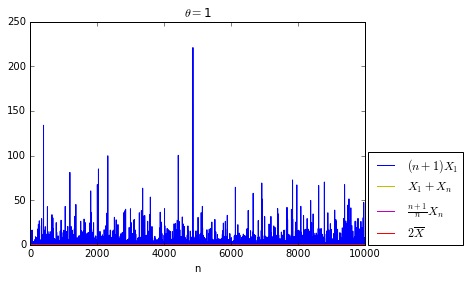

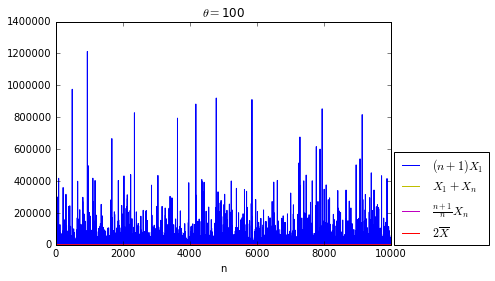

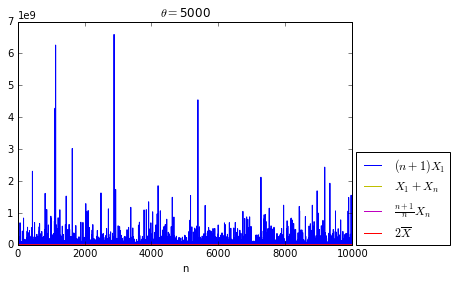

In [2]:
import numpy as np
from matplotlib import mlab
import scipy.stats as sps
import matplotlib.pyplot as plt
from numpy import random
from matplotlib import rcParams
%matplotlib inline

Q = 1
N = 10**4
Arr = []
K = 10
a_arr = [1, 100, 5000]



def rand(q , n):
    arr = []
    for i in range (n):
        arr += [random.uniform(0, q)]
    return arr



def countFirst(a, n):
    sample = a[:n]
    if n!=0:
        return 2 * sum(sample)/n
    else:
        return 0

def countSecond(a, n):
    sample = a[:n]
    if n!= 0:
        return sum(sample)/n + max(sample)/2
    else:
        return 0

def countThird(a, n):
    sample = a[:n]
    return (n+1)*min(sample) 


def countFourth(a, n):
    sample = a[:n]
    return max(sample) + min(sample)

def countFifth(a, n):
    sample = a[:n]
    return (n+1)/n*max(sample)

def dispr(a, func , n):
    X = rand(a, n)
    summ = 0
    sum2 = 0
    a_zv = func(X, n)
    X_boot = [rand(a_zv, n) for i in range(K)]
    for i in range (K):
        boot_a = func(X_boot[i], n)
        summ += boot_a
        sum2 += boot_a ** 2
    return sum2 / K - (summ/K) ** 2


def plot(countFunc, n, q, col, name):
    x = range(n -1)
    Y = []
    for i in range(n - 1):
         Y += [dispr(q,countFunc, i + 1)]
    plt.plot(x, Y, color = col, label = name)
    
def research(q):
    plot(countThird, N, q, 'b', r'$(n+1)X_{1}$')
    plot(countFourth, N, q, 'y', r'$X_{1}+X_{n}$')
    plot(countFifth, N, q, 'm', r'$\frac{n+1}{n}X_{n}$')
    plot(countFirst, N, q, 'r', r'$2\overline{X}$')
    Arr = []

    plt.xlabel('n')
    plt.legend(loc = (1.01,0))    
    plt.title(r'$\theta = $' + str(q))
    plt.show()
    
for i in range(3):
    research(a_arr[i])
#из графиков можно сделать вывод, что в равномерном подходе с квадратичной функцией потерь все оценки,
#кроме первой, хороши 